In [1]:
###########################################################################################################
#Classification of dogs vs cats dataset using classical algorithms
###########################################################################################################

#the model will take some time to run, alternatively you can use the model from pickle files

#importing the required libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import matplotlib.image as img  
from skimage.io import imread
from skimage.transform import resize
import os
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix

In [5]:
#initialising the required variables
target=[]
images=[]
flat_data=[]

#change the DATADIR accordingly where you have downloaded the dog vs cat datset
#or alternatively use the pickle files which i have provided to get the pre trained models.
DATADIR='C:\\Users\\risha\\dvc_dataset\\train'
CATEGORIES=['dogs','cats']

In [4]:
#Data preprocessing
for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(100,100,3))
        flat_data.append(img_resized.flatten())
        target.append(class_num)  

In [5]:
target=np.array(target)
flat_data=np.array(flat_data)

In [6]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,random_state=10)

In [7]:
#Training the decision tree classifier (alternatively use the pickle file provided)
clf1=tree.DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pickle.dump(clf1,open('dvc_dc.p','wb'))

In [2]:
model_dc=pickle.load(open('dvc_dc.p','rb'))

In [8]:
print("decision tree::")
model_dc.score(x_train,y_train),model_dc.score(x_test,y_test)
y_pred1=model_dc.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

decision tree::
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      3110
           1       0.55      0.55      0.55      3140

    accuracy                           0.55      6250
   macro avg       0.55      0.55      0.55      6250
weighted avg       0.55      0.55      0.55      6250

[[1688 1422]
 [1401 1739]]


In [ ]:
#As you can see our decision tree classifier is achieving a precision of 55% for both the classes.

In [11]:
#Training the random tree classifier (alternatively use the pickle file provided)
clf2=RandomForestClassifier()
clf2.fit(x_train,y_train)
pickle.dump(clf2,open('dvc_rf.p','wb'))

In [3]:
model_rf=pickle.load(open('dvc_rf.p','rb'))

In [12]:
print("random forest:")
model_rf.score(x_train,y_train),model_rf.score(x_test,y_test)
y_pred2=model_rf.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

random forest:
              precision    recall  f1-score   support

           0       0.66      0.63      0.65      3110
           1       0.65      0.68      0.66      3140

    accuracy                           0.66      6250
   macro avg       0.66      0.66      0.66      6250
weighted avg       0.66      0.66      0.66      6250

[[1971 1139]
 [1011 2129]]


In [ ]:
#As you can see our random forest classifier is achieving a precision of 66% and 65% for the classes.

Enter the image's path:D:\Rishabh\dvc_dataset\test1\21.jpg
Predicted output: dogs


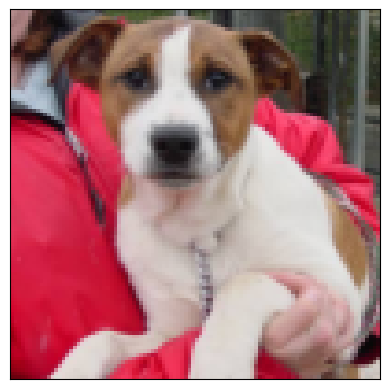

In [6]:
#Tesing a brand new single image 
flat_data_test=[]
dest_image=input("Enter the image's path:")
img=imread(dest_image)
img_resized_test=resize(img,(100,100,3))
flat_data_test.append(img_resized_test.flatten())
flat_data_test=np.array(flat_data_test)
plt.imshow(img_resized_test)
plt.xticks([]),plt.yticks([])
y_out=model_rf.predict(flat_data_test)
y_out=CATEGORIES[y_out[0]]
print("Predicted output:", y_out)
